# Data Preprocessing 

In [259]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [260]:
df = pd.read_csv('../00-data/Housing.csv')

In [261]:
cleanDf = df.copy()

In [262]:
cleanDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [263]:
# Econding Binaray Variable
bi_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
bi_mapping = {"no" : 0, "yes" : 1}

for col in bi_cols:
    cleanDf[col] = cleanDf[col].map(bi_mapping)

cleanDf = pd.get_dummies(cleanDf, columns=['furnishingstatus'], drop_first=True)

boolean_cols = ['furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']
for col in boolean_cols:
    cleanDf[col] = cleanDf[col].astype(int)

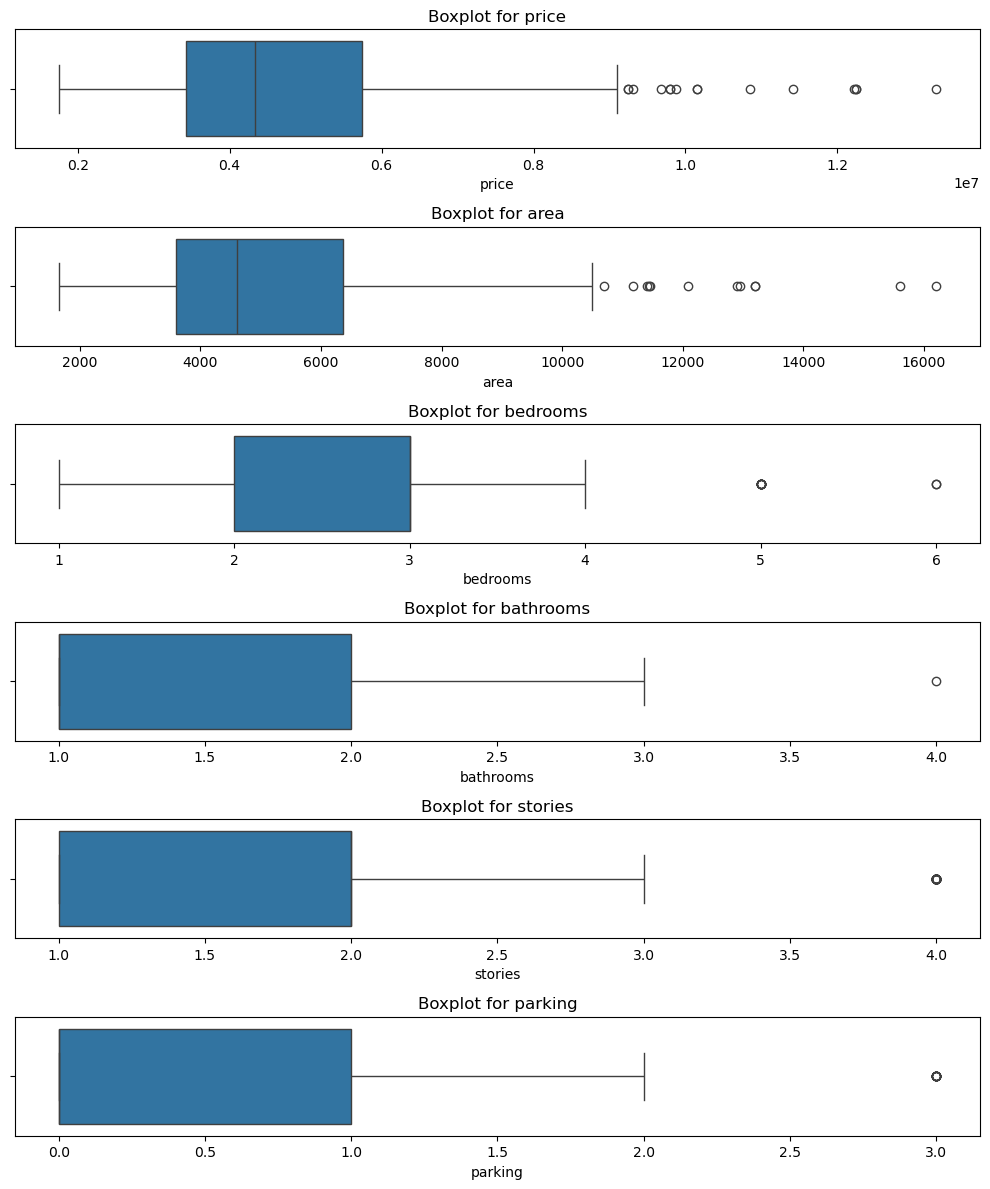

In [264]:
# 
num_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=len(num_cols), ncols=1, figsize=(10, 12))

# Loop through columns and plot on each subplot
for i, col in enumerate(num_cols):
    sns.boxplot(x=cleanDf[col], ax=axes[i], orient='h')
    axes[i].set_title(f'Boxplot for {col}')

plt.tight_layout()
plt.show()

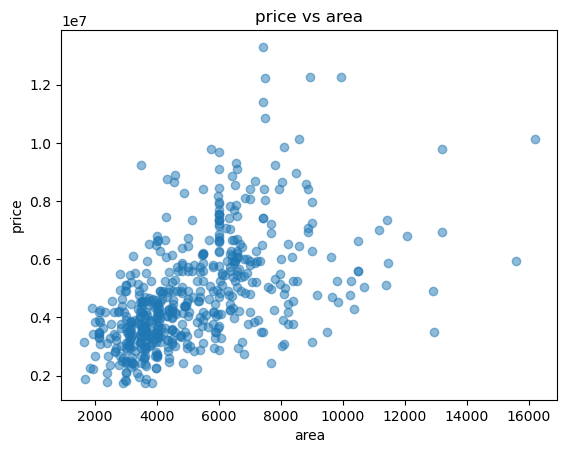

In [265]:
plt.Figure(figsize=(10,6))
plt.scatter(cleanDf['area'], cleanDf['price'], alpha=0.5)
plt.xlabel('area')
plt.ylabel('price')
plt.title('price vs area')
plt.show()

In [266]:
def remove_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.1)
    Q3 = data[col].quantile(0.9)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[col] >= lower) & (data[col] <= upper)]

# Apply to key numerical features
for col in ['area', 'price']:  # Add other relevant ones like 'bathroom', 'parking', etc.
    cleanDf = remove_outliers_iqr(cleanDf, col)


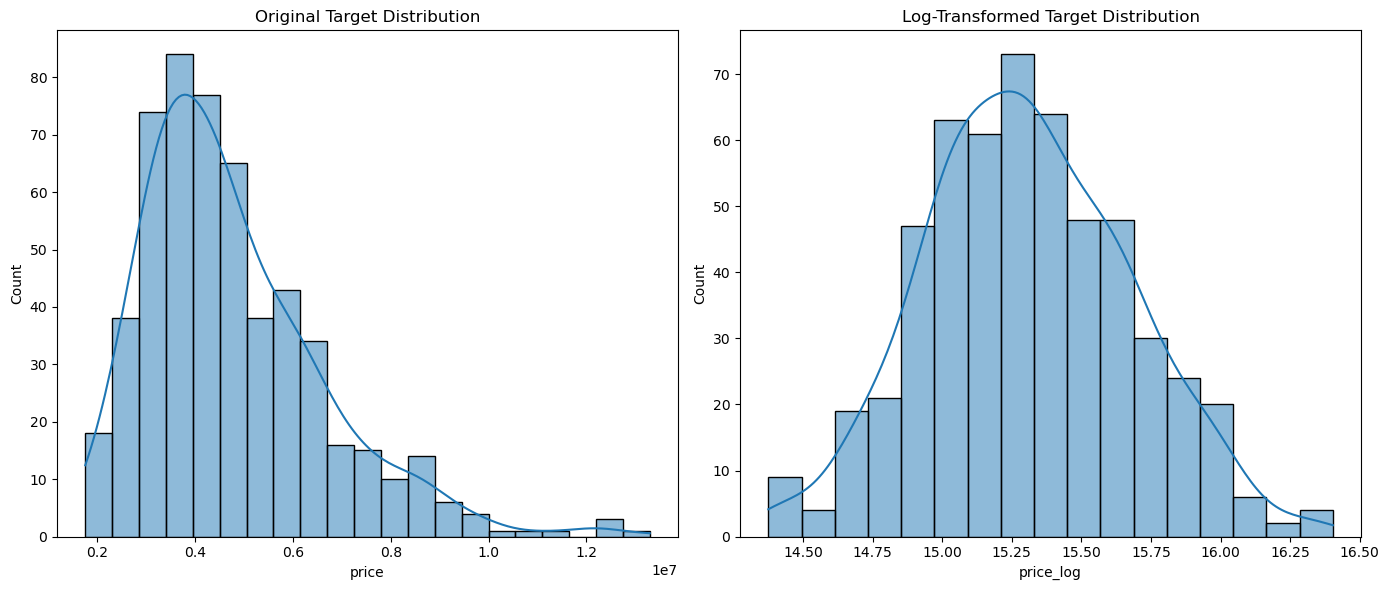

In [267]:
# Version 3: Log transform the target variable (preserves all data points)
logDf = cleanDf.copy()

# y - target variable (price)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Original target distribution
sns.histplot(logDf['price'], kde=True, ax=axes[0])
axes[0].set_title("Original Target Distribution")

# Apply log transform
logDf['price_log'] = np.log1p(logDf['price'])

# Log-transformed target distribution
sns.histplot(logDf['price_log'], kde=True, ax=axes[1])
axes[1].set_title("Log-Transformed Target Distribution")

plt.tight_layout()
plt.show()


In [268]:
# Feature scaling for numerical variables, explore different feature scalling techqiue
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Define numerical features (excluding target!)
features_to_scale = ['area','bathrooms', 'stories', 'parking', 'bedrooms']

# 1. StandardScaler (Z-score normalization)
scaler_std = StandardScaler()
logDf_std =logDf.copy()
logDf_std[features_to_scale] = scaler_std.fit_transform(logDf[features_to_scale])

# 2. MinMaxScaler (0-1 scaling)
scaler_minmax = MinMaxScaler()
logDf_minmax = logDf.copy()
logDf_minmax[features_to_scale] = scaler_minmax.fit_transform(logDf[features_to_scale])

# 3. RobustScaler (uses median and IQR, good with outliers)
scaler_robust = RobustScaler()
logDf_robust =logDf.copy()
logDf_robust[features_to_scale] = scaler_robust.fit_transform(logDf[features_to_scale])

# Display the first few rows of each scaled dataset
print("After StandardScaler:")
print(logDf_std[features_to_scale].head())

print("\nAfter MinMaxScaler:")
print(logDf_minmax[features_to_scale].head())

print("\nAfter RobustScaler:")
print(logDf_robust[features_to_scale].head())


After StandardScaler:
       area  bathrooms   stories   parking  bedrooms
0  1.114732   1.440365  1.375545  1.520339  1.415951
1  1.858191   5.461540  2.528201  2.683077  1.415951
2  2.340957   1.440365  0.222889  1.520339  0.052722
3  1.153353   1.440365  0.222889  2.683077  1.415951
4  1.114732  -0.570222  0.222889  1.520339  1.415951

After MinMaxScaler:
       area  bathrooms   stories   parking  bedrooms
0  0.499567   0.333333  0.666667  0.666667       0.6
1  0.632900   1.000000  1.000000  1.000000       0.6
2  0.719481   0.333333  0.333333  0.666667       0.4
3  0.506494   0.333333  0.333333  1.000000       0.6
4  0.499567   0.000000  0.333333  0.666667       0.6

After RobustScaler:
       area  bathrooms  stories  parking  bedrooms
0  1.033237        1.0      1.0      2.0       1.0
1  1.589595        3.0      2.0      3.0       1.0
2  1.950867        1.0      0.0      2.0       0.0
3  1.062139        1.0      0.0      3.0       1.0
4  1.033237        0.0      0.0      2.0     

### 📘 What is Multicollinearity?
Multicollinearity refers to a situation in regression analysis where two or more independent variables (features) are highly correlated with each other. This violates a key assumption of linear regression — that predictors are not linearly dependent.

❗ Why is Multicollinearity a Problem?
Unstable coefficients: Small changes in data can lead to large changes in model coefficients.

Inflated standard errors: Makes it hard to determine the true effect of each variable.

Reduced model interpretability: You can't tell which variable is driving the response.

Potential overfitting.

🔍 How to Detect Multicollinearity in Python
There are several ways, but the most common and reliable is the Variance Inflation Factor (VIF).

✅ Method 1: Using VIF (Variance Inflation Factor)
VIF quantifies how much the variance of a coefficient is inflated due to multicollinearity.

Rule of Thumb:
- VIF = 1: No multicollinearity
- VIF > 5: Moderate multicollinearity
- VIF > 10: Serious multicollinearity (consider removal)

🧹 What to Do if Multicollinearity is Found?
Drop one of the correlated variables (e.g., choose the one with lower correlation with the target).

Combine features (e.g., PCA or feature engineering).

Use regularized models like Ridge or Lasso regression, which handle multicollinearity better.


In [269]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Suppose X is your features DataFrame (after encoding & scaling)
X = logDf_std.drop('price', axis=1)

# Add constant for intercept (required by statsmodels)
X_const = add_constant(X)

# Compute VIF
vif = pd.DataFrame()
vif["Feature"] = X_const.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
print(vif.sort_values(by="VIF", ascending=False))

# Ignore the VIF value of const when assessing multicollinearity.


                            Feature          VIF
0                             const  5492.697623
14                        price_log     3.302386
13     furnishingstatus_unfurnished     1.741006
4                           stories     1.630950
1                              area     1.603919
12  furnishingstatus_semi-furnished     1.579524
3                         bathrooms     1.433552
9                   airconditioning     1.377860
2                          bedrooms     1.373566
7                          basement     1.365930
10                          parking     1.263435
6                         guestroom     1.231408
11                         prefarea     1.225856
5                          mainroad     1.212577
8                   hotwaterheating     1.070116


### Conclusion

- No Multicollinearity, since all VIF scores are less than 5
- Each feature are independent from each other which is ideal and satisfies linear regression assumption 

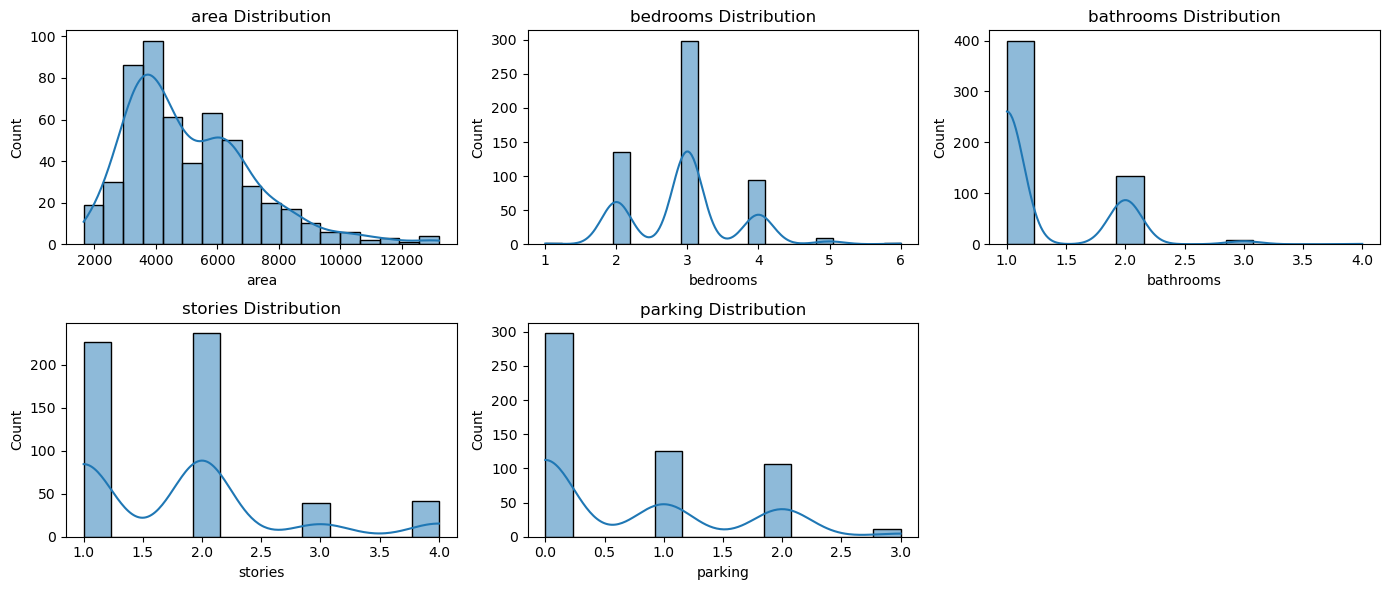

In [270]:
# Examine distribution of numerical features
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14,6))
axes = axes.flatten()
num_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
for i, feature in enumerate(num_features):
    sns.histplot(logDf[feature], kde=True, ax=axes[i])
    axes[i].set_title(f"{feature} Distribution")


axes[-1].axis('off')
plt.tight_layout()
plt.show()

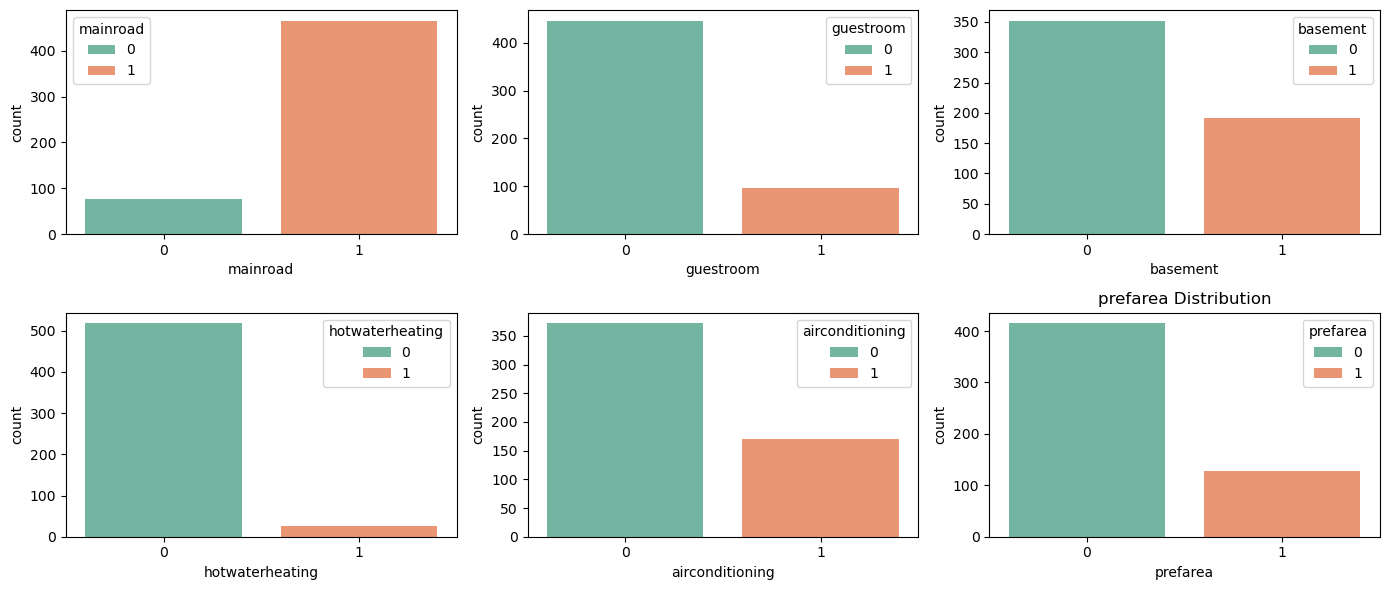

In [271]:
# # Examine categorical feature distributions
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14,6))
axes = axes.flatten()
cat_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for i, feature in enumerate(cat_features):
    sns.countplot(x=feature, data=logDf, ax=axes[i], hue=feature, palette='Set2')
    plt.title(f'{feature} Distribution')
    
plt.tight_layout()
plt.show()

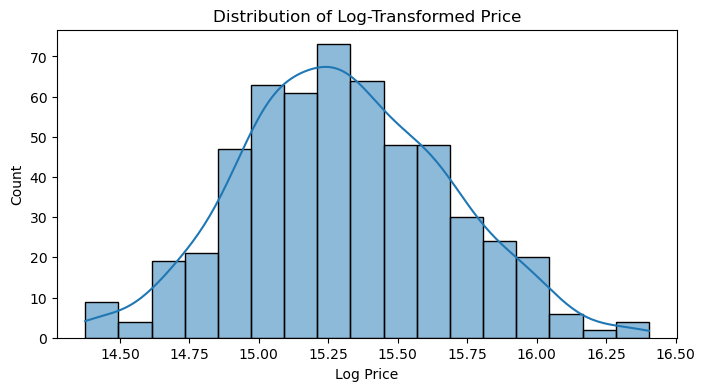

In [272]:
# Verify the effect of log transformation on price
plt.figure(figsize=(8,4))
sns.histplot(logDf['price_log'], kde=True)
plt.title('Distribution of Log-Transformed Price')
plt.xlabel('Log Price')
plt.show()

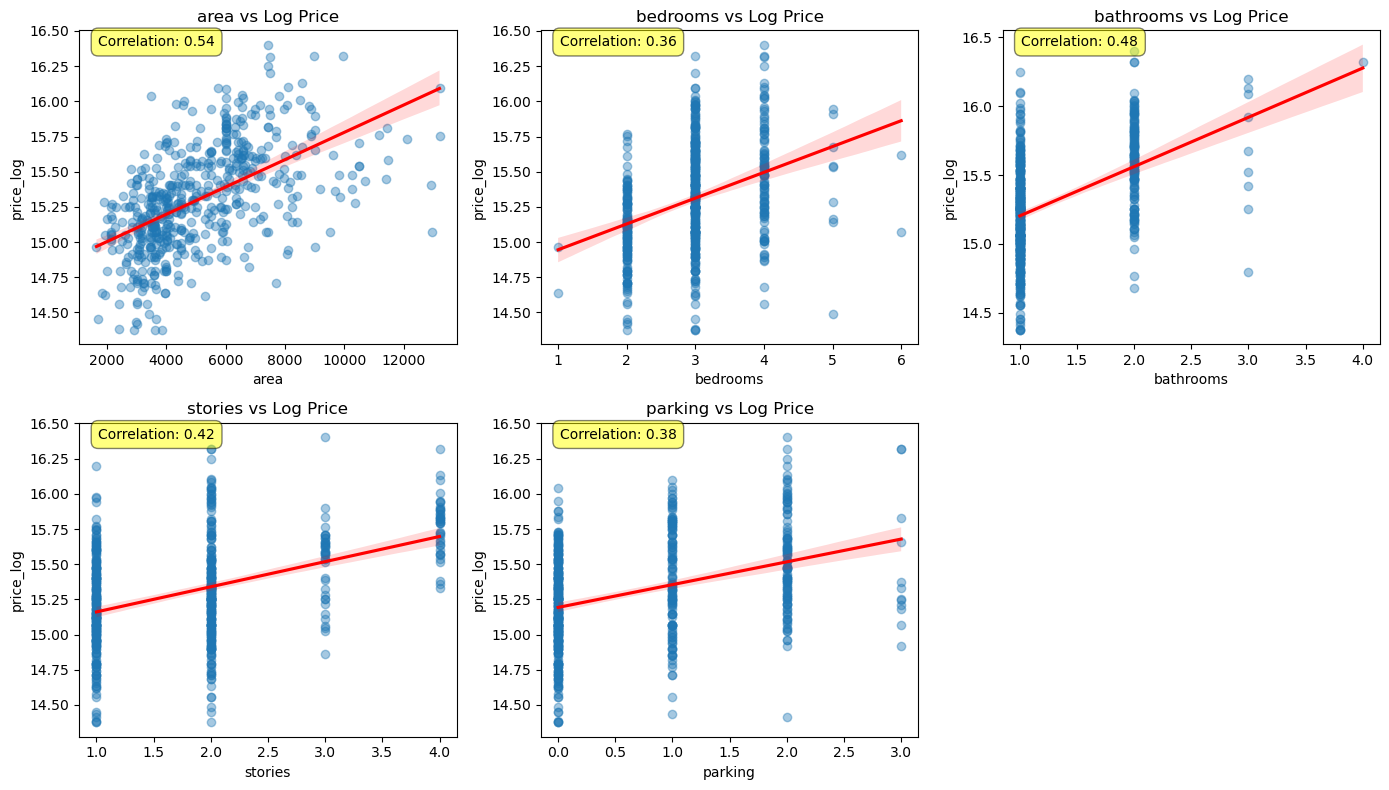

In [273]:
# Numberical Feature vs Log Price
num_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))
axes = axes.flatten()

for i, feature in enumerate(num_features):
    sns.regplot(
        x=feature, y='price_log', data=logDf,
        scatter_kws={'alpha': 0.4}, line_kws={'color': 'red'},
        ax=axes[i]
    )
    axes[i].set_title(f'{feature} vs Log Price')

    # Add correlation annotation
    corr = logDf[feature].corr(logDf['price_log'])
    axes[i].annotate(f'Correlation: {corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction',
                     bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))

# Hide extra subplot
axes[-1].axis('off')

plt.tight_layout()
plt.show()


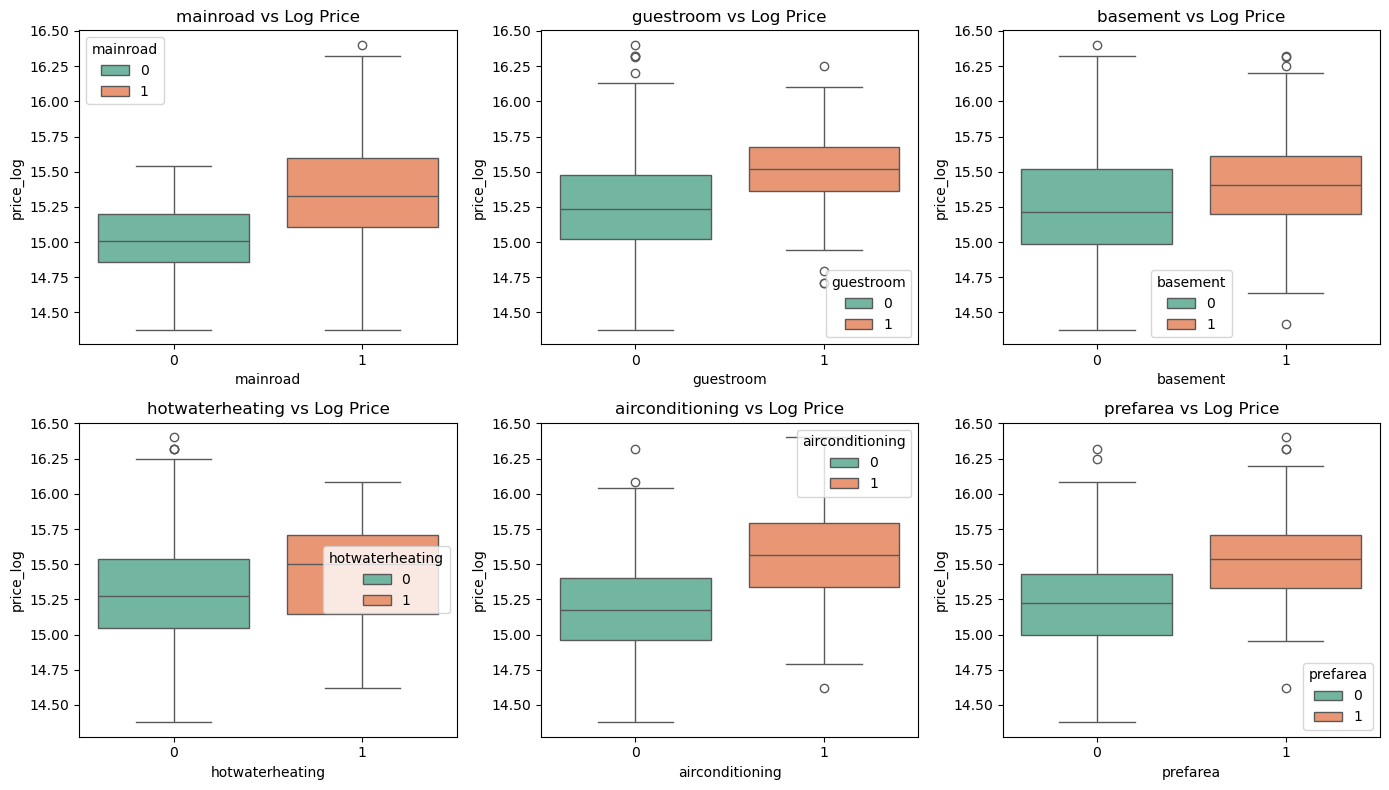

In [274]:
# Categorical Features vs Log Price 
cat_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))
axes = axes.flatten()

for i, feature in enumerate(cat_features):
    sns.boxplot(x=feature, y='price_log', data=logDf, ax=axes[i], hue=feature,palette='Set2')
    axes[i].set_title(f'{feature} vs Log Price')

plt.tight_layout()
plt.show()


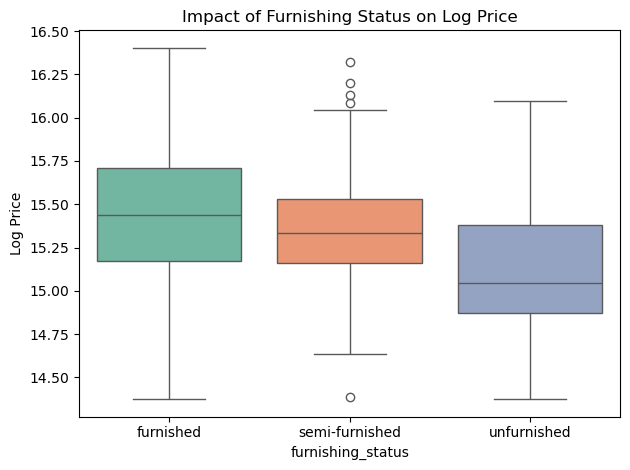

In [275]:
# Create a readable categorical column from the one-hot encoded columns
furnishing_data = logDf.copy()
furnishing_data['furnishing_status'] = 'furnished'
furnishing_data.loc[logDf['furnishingstatus_semi-furnished'] == 1, 'furnishing_status'] = 'semi-furnished'
furnishing_data.loc[logDf['furnishingstatus_unfurnished'] == 1, 'furnishing_status'] = 'unfurnished'

sns.boxplot(x=furnishing_data['furnishing_status'], y=furnishing_data['price_log'], data=furnishing_data, hue='furnishing_status', palette='Set2')
plt.title('Impact of Furnishing Status on Log Price')
plt.ylabel('Log Price')

plt.tight_layout()
plt.show()


In [278]:
logDf_std

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,price_log
0,13300000,1.114732,1.415951,1.440365,1.375545,1,0,0,0,1,1.520339,1,0,0,16.403275
1,12250000,1.858191,1.415951,5.461540,2.528201,1,0,0,0,1,2.683077,0,0,0,16.321037
2,12250000,2.340957,0.052722,1.440365,0.222889,1,0,1,0,0,1.520339,1,1,0,16.321037
3,12215000,1.153353,1.415951,1.440365,0.222889,1,0,1,0,1,2.683077,1,0,0,16.318175
4,11410000,1.114732,1.415951,-0.570222,0.222889,1,1,1,0,1,1.520339,0,0,0,16.250001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,-1.019094,-1.310508,-0.570222,-0.929767,1,0,1,0,0,1.520339,0,0,1,14.414348
541,1767150,-1.308754,0.052722,-0.570222,-0.929767,0,0,0,0,0,-0.805137,0,1,0,14.384879
542,1750000,-0.719779,-1.310508,-0.570222,-0.929767,1,0,0,0,0,-0.805137,0,0,1,14.375127
543,1750000,-1.062543,0.052722,-0.570222,-0.929767,0,0,0,0,0,-0.805137,0,0,0,14.375127


In [279]:
logDf_std.to_csv('../00-data/cleaned_housing.csv', index=False)